<div class = "alert alert-info">
    <h2 align='center'> DecisionTree Classification Algorithm</h2>
    <h2 align='center'> Flower categories</h2>
    <h2 align='center'> Dr.shaygan Fard</h2>
    <h3 align='center'>Milad Moradnia</h3>
    <h4 align='center'>991114032</h4>
    <h5 align='center'> Data Mining</h5>
</div>


# Importing the Required Libraries and Reading the data

First thing is to import all the necessary libraries and classes.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
%matplotlib inline

Now load the dataset. IRIS dataset is available in the seaborn library as well

# reading the data

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here we have 4 feature columns sepal_length, sepal_width, petal_length, and petal_width respectively with one target column species.

# Exploratory Data Analysis

getting information of dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

we understand that this dataset has 150 records, 5 columns with the first four of type float and last of type object str and there are no NAN values as form following command

In [8]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Now we perform some basic EDA on this dataset. Let’s check the correlation of all the features with each other

let's plot pair plot to visualise the attributes all at once

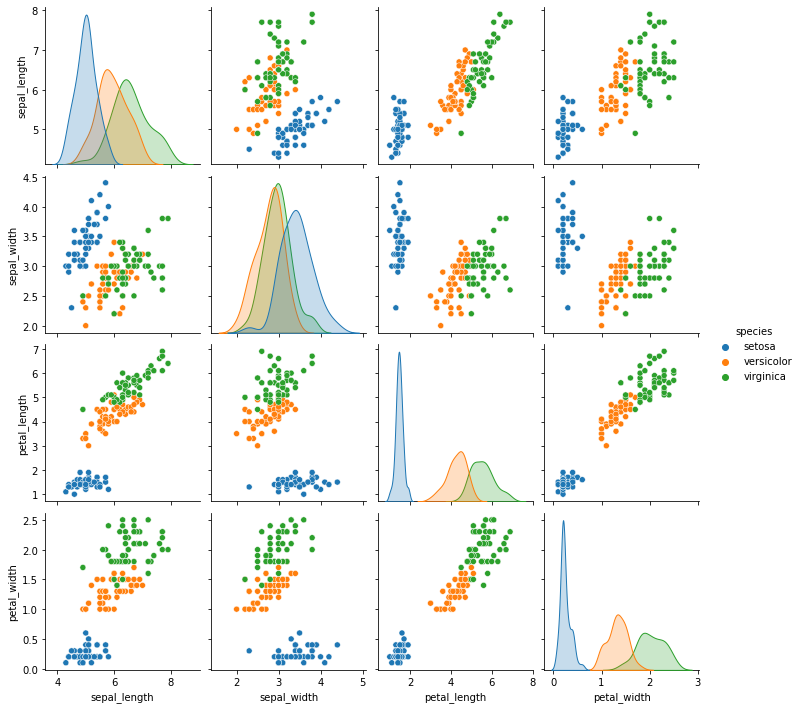

In [14]:
sns.pairplot(data=df, hue = 'species')

We have a total of 3 species that we want to predict: setosa, versicolor, and virginica. We can see that setosa always forms a different cluster from the other two.

# Correlation matrix

<AxesSubplot:>

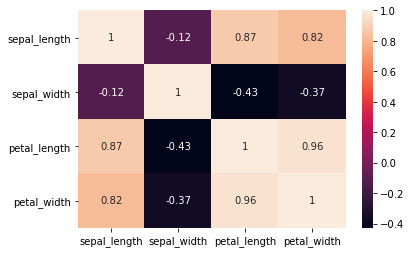

In [15]:
sns.heatmap(df.corr(),annot=True)

We can observe from the above two plots:

    Setosa always forms a different cluster.
    Petal length is highly related to petal width.
    Sepal length is not related to sepal width.


# Data Preprocessing

Now, we will separate the target variable(y) and features(X) as follows

In [16]:
target = df['species']
df1 = df.copy()
df1 = df1.drop('species', axis =1)

It is good practice not to drop or add a new column to the original dataset. Make a copy of it and then modify it so in case things don’t work out as we expected, we have the original data to start again with a different approach.

Just for the sake of following mostly used convention, we are storing df in X

In [17]:
# Defining the attributes
X = df1

Now let’s look at our target variable

In [18]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [19]:
target.shape

(150,)

target has categorical variables stored in it we will encode it in numeric values for working.

In [20]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We get its encoding as above, setosa:0, versicolor:1, virginica:2

Again for the sake of following the standard naming convention, naming target as y

In [21]:
y = target

Splitting the dataset into training and testing sets. selecting 20% records randomly for testing

In [23]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (120, 4)
Testing split input-  (30, 4)


After splitting the dataset we have 120 records(rows) for training and 30 records for testing purposes.

# Modeling Tree and testing it

Defining the decision tree algorithm

In [34]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In the above code, we created an object of the class DecisionTreeClassifier , store its address in the variable dtree, so we can access the object using dtree. Then we fit this tree with our X_train and y_train . Finally, we print the statement Decision Tree Classifier Created after the decision tree is built.

# Predicting the values of test data

In [35]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We got an accuracy of 100% on the testing dataset of 30 records.

# let’s plot the confusion matrix as follows

Text(0.5, 1.0, 'Accuracy Score: 1.0')

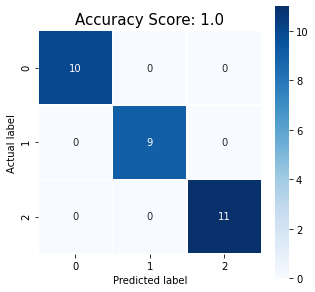

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# Predict New Sample

In [42]:
dtree.predict(
    [
        [2.1,1.8,1.8,1.9]
    ]
)

array([2])

lablel 2 is virginica

# Visualizing the decision tree

We can directly plot the tree that we build using the following commands

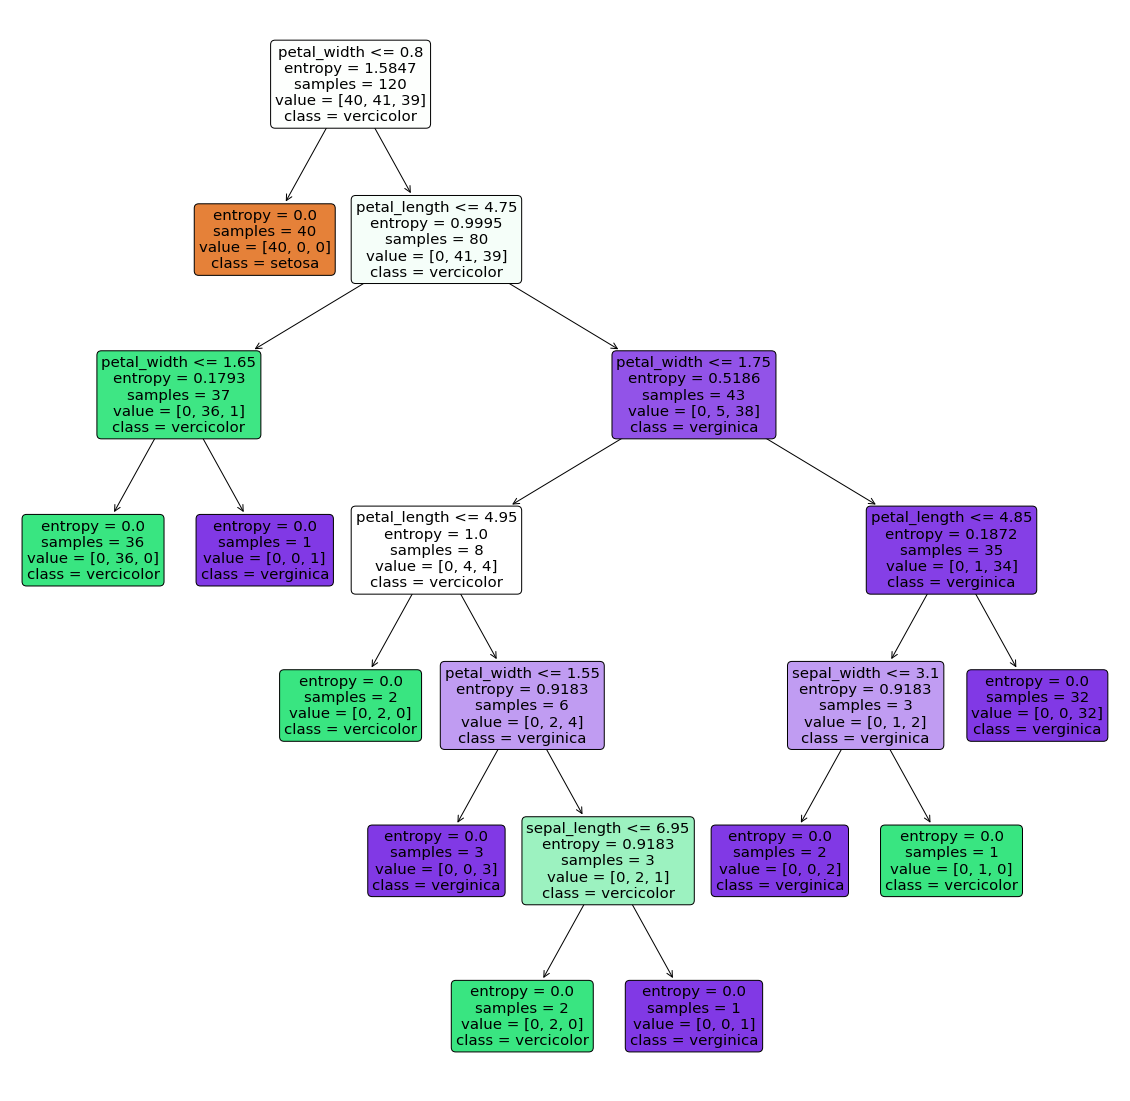

In [39]:
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["setosa", "vercicolor", "verginica"] , filled = True , precision = 4, rounded = True)

# Thanks